In [ ]:
# install chfem
!pip install git+https://gitlab.com/cortezpedro/chfem_gpu.git@dev -q

# To enable c stdout printing in colab notebook
!pip install wurlitzer -q
import wurlitzer
wurlitzer.Wurlitzer.flush_interval=0.001
%load_ext wurlitzer

# necessary for pyvista plots
!pip install pyvista -q
!pip install piglet -q
!pip install pyvirtualdisplay -q
!apt-get -qq install xvfb
from pyvirtualdisplay import Display
display = Display(visible=0, size=(600, 400))
display.start()
def pv_plot(array):
  grid = pv.ImageData()
  grid.dimensions = array.shape
  grid.point_data["scalars"] = array.flatten(order="F")
  plotter = pv.Plotter(notebook=True)
  plotter.add_volume(grid, scalars="scalars", cmap="jet")
  plotter.show()

# other imports
from matplotlib import pyplot as plt
import pyvista as pv
import numpy as np
import chfem

/usr/local/lib/python3.10/dist-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


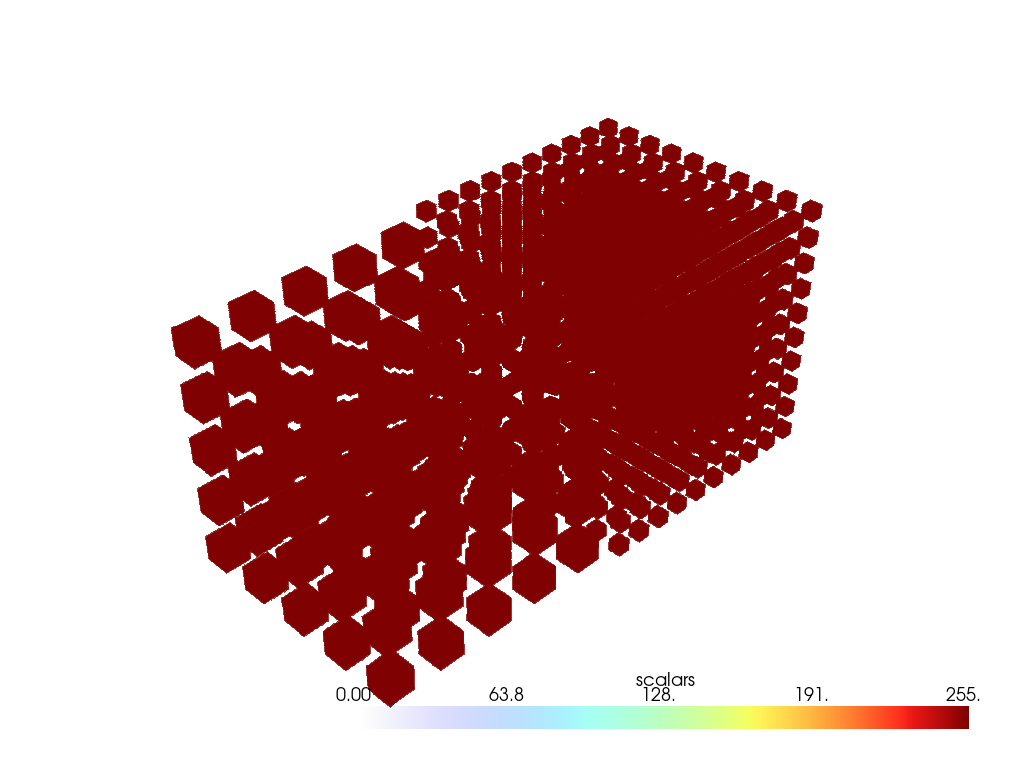

In [ ]:
def create_cube_array(array_side, cube_side, ntiles):
    cube = np.zeros((array_side, array_side, array_side), dtype=np.uint8)
    start_cube = array_side // 4
    end_cube = start_cube + cube_side
    cube[start_cube:end_cube, start_cube:end_cube, start_cube:end_cube] = 1
    cube_array = np.tile(cube, (ntiles, ntiles, ntiles))
    return cube_array

left = create_cube_array(10, 5, 10)
right = create_cube_array(20, 10, 5)
array = np.concatenate((left, right), axis=0)
array[array == 1] = 255

pv_plot(array)

Calling chfem wrapper
Initializing femhmg...
    Scanning through neutral file...[100%]
    Building model struct...[100%]
    Getting image from numpy...[100%]
    Assembling maps and local matrices...[100%]
Done.(5.74e-01 s)
*******************************************************
MODEL DATA:
Analysis: THERMAL_3D
Homogenization on direction: X
Number of elements (x,y,z): [200,100,100]
Number of elements (total): 2000000
Number of nodes: 2050401
Number of DOFs: 2000000
Number of materials: 2
Numerical tolerance: 1.000000e-06
Max iterations: 10000
Solver: PCG
*******************************************************
Parallel assembly on-the-fly strategy: Node-by-node (0)
*******************************************************
Running homogenization...
    Initializing solver...Done.(8.40e+00 s)
    ------------------------------------------------------
    Analysis on X:
    Assembling RHS...Done.(2.08e-02 s)
    Solving system of equations...
    | iteration: 257, residual: 8.831e-07
   

/usr/local/lib/python3.10/dist-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


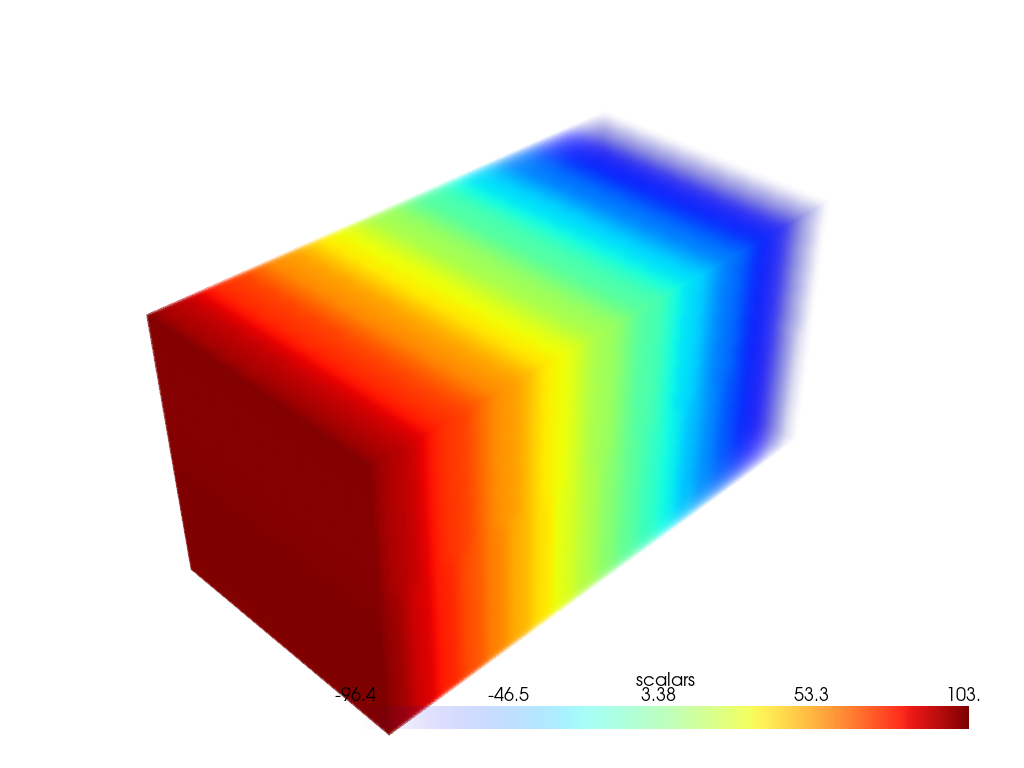

In [ ]:
keff = chfem.compute_conductivity(array, mat_props=[(255, 1), (0, 0.1)], direction='x', output_fields="cubes")

temperature = chfem.import_scalar_field_from_chfem("cubes_temperature_0.bin", array.shape, rotate_domain=True)
pv_plot(temperature)

Calling chfem wrapper
Initializing femhmg...
    Scanning through neutral file...[100%]
    Building model struct...[100%]
    Getting image from numpy...[100%]
    Assembling maps and local matrices...[100%]
Done.(3.27e-01 s)
*******************************************************
MODEL DATA:
Analysis: ELASTIC_3D
Homogenization on direction: X
Number of elements (x,y,z): [200,100,100]
Number of elements (total): 2000000
Number of nodes: 2050401
Number of DOFs: 6000000
Number of materials: 2
Numerical tolerance: 1.000000e-06
Max iterations: 10000
Solver: PCG
*******************************************************
Parallel assembly on-the-fly strategy: Node-by-node (0)
*******************************************************
Running homogenization...
    Initializing solver...Done.(6.77e-02 s)
    ------------------------------------------------------
    Analysis on X:
    Assembling RHS...Done.(3.47e-02 s)
    Solving system of equations...
    | iteration: 260, residual: 9.946e-07
   

IOStream.flush timed out


5.77043081e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.77366991e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.12130761e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.06277693e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -6.42925674e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
-------------------------------------------------------
Elapsed time (total): 2.69e+01 s
#######################################################


/usr/local/lib/python3.10/dist-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


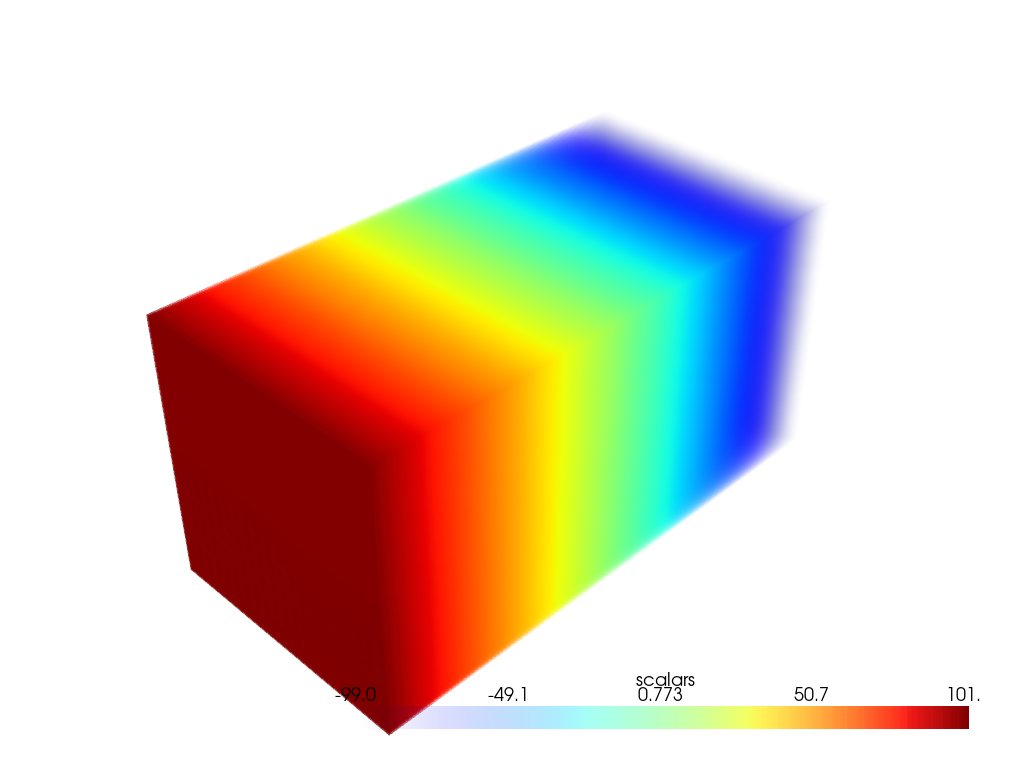

In [ ]:
Ceff = chfem.compute_elasticity(array, mat_props=[(255, 200, 0.2), (0, 100, 0.3)], direction='x', output_fields="cubes")

displacement = chfem.import_vector_field_from_chfem("cubes_displacement_0.bin", array.shape, rotate_domain=True)
pv_plot(displacement[:, :, :, 0])

Calling chfem wrapper
Initializing femhmg...
    Scanning through neutral file...[100%]
    Building model struct...[100%]
    Getting image from numpy...[100%]
    Assembling maps and local matrices...[100%]
Done.(2.89e-01 s)
*******************************************************
MODEL DATA:
Analysis: FLUID_3D
Homogenization on direction: X
Number of elements (x,y,z): [200,100,100]
Number of elements (total): 2000000
Number of nodes: 2050401
Number of DOFs: 6416000
Number of materials: 2
Numerical tolerance: 1.000000e-06
Max iterations: 10000
Solver: PCG
*******************************************************
Parallel assembly on-the-fly strategy: Node-by-node (0)
*******************************************************
Running homogenization...
    Initializing solver...Done.(8.26e-02 s)
    ------------------------------------------------------
    Analysis on X:
    Assembling RHS...Done.(1.76e-01 s)
    Solving system of equations...
    | iteration: 289, residual: 5.676e-07
    |

/usr/local/lib/python3.10/dist-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


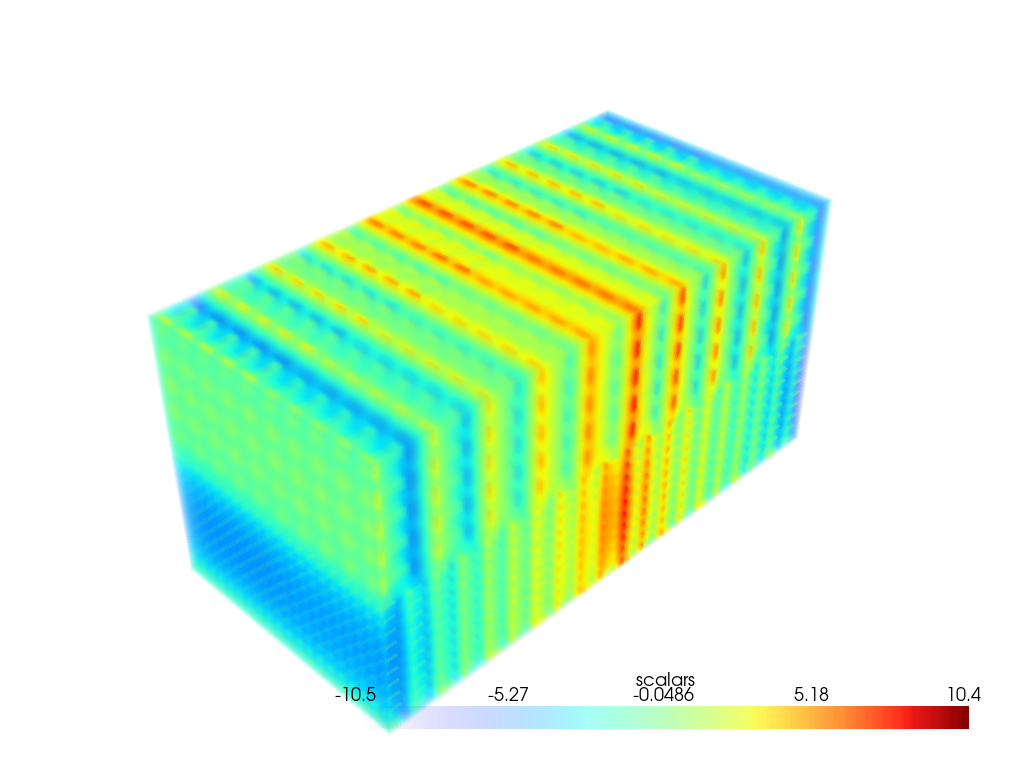

In [ ]:
Keff = chfem.compute_permeability(array, direction='x', output_fields="cubes")

pressure = chfem.import_scalar_field_from_chfem("cubes_pressure_0.bin", array.shape, rotate_domain=True)
pv_plot(pressure)